Lets plot some data using Python
------------------------------------------------

In [1]:
# first import statements 
import matplotlib.pyplot as plt 
from matplotlib import cm
import pandas as pd 
import numpy as np
import re
import os
import glob
import seaborn as sns
from scipy import stats
#from statannotations.Annotator import Annotator



In [2]:
path = os.getcwd()

fileList = sorted(glob.glob(path +'/*.csv'))
list = [pd.read_csv(filename, header=None) for filename in fileList]
names = [os.path.basename(filename) for filename in fileList]

print(names)

df = pd.concat(list, axis=0, ignore_index=False, keys=names)
df.head()

['Christrup100ugCon50ugPermL5min.csv', 'Christrup100ugCon50ugPermL5minUpper.csv', 'HanFent200ug10sCon50ugPer1ml.csv', 'Saari2min5ugPerkgCon50ugPer1ml.csv', 'Saari2min5ugPerkgCon50ugPer1mlUpper.csv', 'StockelValidationUpper.csv', 'Stoeckel0p5mg.csv', 'Stoeckel0p5mgUpper.csv', 'StoeckelValidation.csv', 'Ziesenitz2013Fent10min5ugPerkgCon0p5mgPer10ml.csv', 'Ziesenitz2013Fent10min5ugPerkgCon0p5mgPer10mlUpper.csv', 'Ziesenitz201510min5ugPerkgCon0p5mgPer10ml.csv', 'Ziesenitz201510min5ugPerkgCon0p5mgPer10mlUpper.csv', 'mcquay25ugPerkg.csv', 'mcquay25ugPerkgUpper.csv']


0         1
Christrup100ugCon50ugPermL5min.csv 0 -0.093458  0.043377
                                   1  0.887850  0.415075
                                   2  2.897196  1.669443
                                   3  4.906542  0.989029
                                   4  6.869159  0.971556

In [3]:
#load in the model data: 
# path = os.getcwd()

# fileListModel = sorted(glob.glob(path + '/modelData' + '/*.csv'))
# listModel = [pd.read_csv(filename, header=0) for filename in fileListModel]
# namesModel = [os.path.basename(filename) for filename in fileListModel]

# print(namesModel)

# dfModel = pd.concat(listModel, axis=0, ignore_index=False, keys=namesModel)
# print(dfModel.keys())
dfStoeckel = pd.read_csv('./modelData/Stoeckel0p5mgResults.csv')
dfZ = pd.read_csv('./modelData/ZiesenitzResults.csv')
dfChrist = pd.read_csv('./modelData/Christrup100ugCon50ugPermL5minResults.csv')
dfHan = pd.read_csv('./modelData/HanFent200ug10sCon50ugPer1mlResults.csv')
dfmcquay = pd.read_csv('./modelData/mcquay25ugPerkgResults.csv')
dfSaari = pd.read_csv('./modelData/Saari2min5ugPerkgCon50ugPer1mlResults.csv')


#dfModel.loc['Stoeckel0p5mg.csv', 'HeartRate(1/min)']

In [4]:
dfStoeckel.iloc[:,0]


0            0.02
1            0.04
2            0.06
3            0.08
4            0.10
           ...   
360047    7200.96
360048    7200.98
360049    7201.00
360050    7201.02
360051    7201.04
Name: Time(s), Length: 360052, dtype: float64

In [5]:
#test some shapes 
print(df.loc['Stoeckel0p5mg.csv', :0].shape)
print(df.loc['Stoeckel0p5mg.csv', 1:1].shape)
print(df.loc['Stoeckel0p5mgUpper.csv', 1:1].T.shape)

(15, 1)
(15, 1)
(1, 15)


In [6]:
#load in the deviations: 

ChristrupUpper = np.loadtxt('Christrup100ugCon50ugPermL5minUpper.csv', delimiter=',')
mcquayUpper = np.loadtxt('mcquay25ugPerkgUpper.csv', delimiter=',')
mcquayUpper = np.loadtxt('mcquay25ugPerkgUpper.csv', delimiter=',')
stoeckelUpper = np.loadtxt('mcquay25ugPerkgUpper.csv', delimiter=',')
ziesenitz2013Upper = np.loadtxt('Ziesenitz2013Fent10min5ugPerkgCon0p5mgPer10mlUpper.csv', delimiter=',')

print(ChristrupUpper[:,1])



[0.05434783 0.84985778 2.94118245 1.46718813 1.3411215  1.11722877
 0.84122308 0.69565217 0.69565217 0.53230394]


In [7]:
t = "Time(s)"
y1 = "VenaCava-Naloxone-Concentration(ug/L)"
y2 = "VenaCava-Fentanyl-Concentration(ug/L)"

In [8]:


def rmse(validationdata, simulateddata, independantVar = '', dependantVar = '', tolerance = 0.0001668, scaleValue = True, scalet = True):
    
    temp = 0 
    index = []
    num_rows, num_cols = validationdata.shape
    # store off the data scaled by t if true: 
    dfTemp = simulateddata.copy()
    if scalet:
        dfTemp[t] = dfTemp[t].div(60)
    else: 
        dfTemp = dfTemp
    #print(dfTemp[t])
    #iterate over the time values in validation 
    for idx in dfTemp.index:
        for i in np.arange(0, num_rows, 1):
            diff = abs(dfTemp[t][idx] - validationdata[i,0])
            #print(dfTemp[t][idx])
            if diff < tolerance:
                #print(diff)
                #print(dfTemp[t][idx])
                #print(validationdata[i,0])
                if scaleValue:
                    temp = abs(dfTemp[dependantVar][idx] - validationdata[i,1]/1e3)
                else:
                    temp = abs(dfTemp[dependantVar][idx] - validationdata[i,1])
                       #store the difference
                index.append(temp)
                #print(temp)
    
    print(len(index))
    #index should have the difference values now: 
    arg = 0 
    for i in index:
        arg += i**2
        
    return sqrt(arg/len(index))


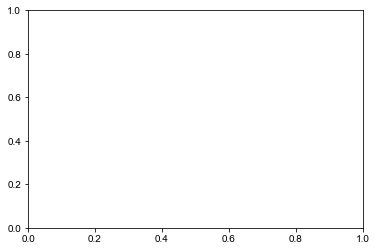

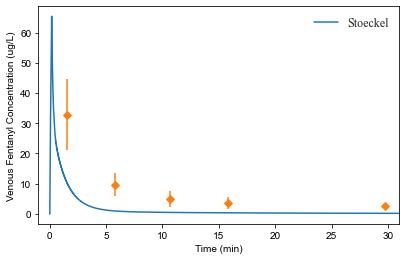

In [9]:
#fentanyl plot 
# 16 mg
plt.clf()
plt.cla()
test = df.loc['Stoeckel0p5mg.csv']
testError = df.loc['Stoeckel0p5mgUpper.csv']
#testError.head()
testError = testError[1] - test[1]
fig1 = plt.figure(figsize = (6.472, 4))
ax = fig1.add_subplot(1,1,1)
ax = plt.gca()
plt.style.use('tableau-colorblind10')
plt.rc('font', family='Times New Roman')
plt.rc('xtick', labelsize = 'medium')
plt.rc('ytick', labelsize = 'medium')
ax.set_xlim([-1, 31])
#plt.yscale("log")
ax.set_xlabel('Time (min)')
ax.set_ylabel('Venous Fentanyl Concentration (ug/L)')
#ax.set_ylim([0.5, 100])
plt.plot(dfStoeckel.iloc[:,0] / 60, dfStoeckel.loc[:, 'Fentanyl-PlasmaConcentration(ug/L)'], label='Stoeckel')
plt.errorbar(test[0] , test[1], yerr=testError.T,  fmt='D')
ax.legend(fontsize='large')
#plt.show()
fig1.savefig('Stoeckel.png',bbox_inches='tight', dpi=300)

<Figure size 432x288 with 0 Axes>

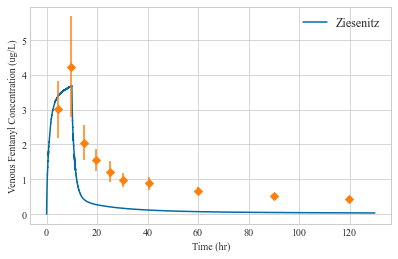

In [15]:
#fentanyl plot 
# 16 mg
plt.clf()
plt.cla()
testZ = df.loc['Ziesenitz201510min5ugPerkgCon0p5mgPer10ml.csv']
testErrorZ = df.loc['Ziesenitz201510min5ugPerkgCon0p5mgPer10mlUpper.csv']
#testError.head()
testErrorZ = testErrorZ[1] - testZ[1]
#print(test[1])
plt.clf()
fig1 = plt.figure(figsize = (6.472, 4))
ax = fig1.add_subplot(1,1,1)
ax = plt.gca()
plt.rc('font', family='Times New Roman')
plt.style.use('tableau-colorblind10')
plt.rc('xtick', labelsize = 'medium')
plt.rc('ytick', labelsize = 'medium')
#plt.yscale("log")
ax.set_xlabel('Time (hr)')
#ax.set_xlim([-0.01, 0.7])
ax.set_ylabel('Venous Fentanyl Concentration (ug/L)')
#ax.set_ylim([0.5, 100])
plt.plot(dfZ.iloc[:,0]/60, dfZ.loc[:, 'Fentanyl-PlasmaConcentration(ug/L)'], label='Ziesenitz')
plt.errorbar(testZ[0]*60 , testZ[1], yerr=testErrorZ.T,  fmt='D')
ax.legend(fontsize='large')
#plt.show()
fig1.savefig('Ziesenitz.png',bbox_inches='tight', dpi=300)

<Figure size 432x288 with 0 Axes>

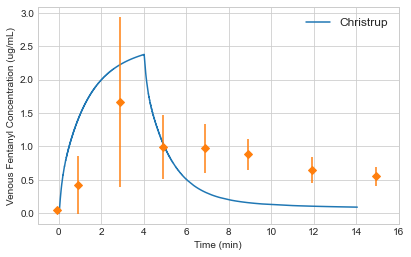

In [11]:
#fentanyl plot 
# 16 mg
plt.clf()
plt.cla()
testC = df.loc['Christrup100ugCon50ugPermL5min.csv']
testErrorC = df.loc['Christrup100ugCon50ugPermL5minUpper.csv']
#testError.head()
testErrorC = testErrorC[1] - testC[1]
#print(test[1])
plt.clf()
fig1 = plt.figure(figsize = (6.472, 4))
ax = fig1.add_subplot(1,1,1)
ax = plt.gca()
plt.rc('font', family='Times New Roman')
plt.style.use('tableau-colorblind10')
plt.rc('xtick', labelsize = 'medium')
plt.rc('ytick', labelsize = 'medium')
#plt.yscale("log")
ax.set_xlabel('Time (min)')
ax.set_ylabel('Venous Fentanyl Concentration (ug/mL)')
ax.set_xlim([-1, 16])
plt.plot(dfChrist.iloc[:,0]/60, dfChrist.loc[:, 'Fentanyl-PlasmaConcentration(ug/L)'], label='Christrup')
plt.errorbar(testC[0] , testC[1], yerr=testErrorC[:9].T,  fmt='D')
ax.legend(fontsize='large')
#plt.show()
fig1.savefig('Christrup.png',bbox_inches='tight', dpi=300)

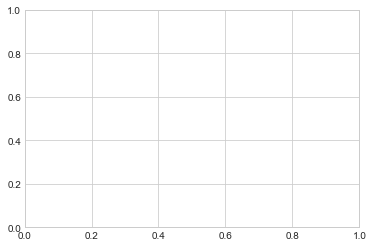

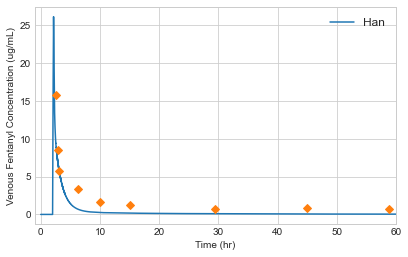

In [12]:
#fentanyl plot 
# 16 mg
plt.clf()
plt.cla()
testHan = df.loc['HanFent200ug10sCon50ugPer1ml.csv']
fig1 = plt.figure(figsize = (6.472, 4))
ax = fig1.add_subplot(1,1,1)
ax = plt.gca()
plt.rc('font', family='Times New Roman')
plt.style.use('tableau-colorblind10')
plt.rc('xtick', labelsize = 'medium')
plt.rc('ytick', labelsize = 'medium')
#plt.yscale("log")
ax.set_xlim([-1, 60])
ax.set_xlabel('Time (hr)')
ax.set_ylabel('Venous Fentanyl Concentration (ug/mL)')
#ax.set_ylim([0.5, 100])
plt.plot(dfHan.iloc[:,0]/60, dfHan.loc[:, 'Fentanyl-PlasmaConcentration(ug/L)'], label='Han')
plt.errorbar(testHan[0]*60, testHan[1],  fmt='D')
ax.legend(fontsize='large')
#plt.show()
fig1.savefig('Han.png',bbox_inches='tight', dpi=300)

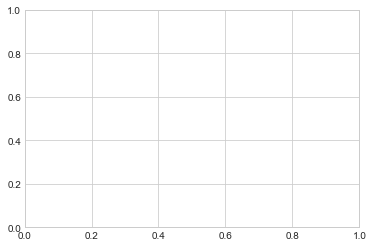

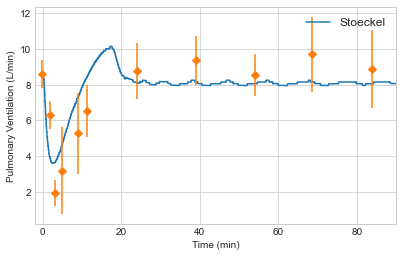

In [13]:
#fentanyl plot 
# 16 mg
plt.clf()
plt.cla()
testValidation = df.loc['StoeckelValidation.csv']
testErrorValidation = df.loc['StockelValidationUpper.csv']
#testError.head()
testErrorValidation = testErrorValidation[1] - testValidation[1]
fig1 = plt.figure(figsize = (6.472, 4))
ax = fig1.add_subplot(1,1,1)
ax = plt.gca()
plt.rcParams['font.family']='Times New Roman'
plt.style.use('tableau-colorblind10')
plt.rc('xtick', labelsize = 'medium')
plt.rc('ytick', labelsize = 'medium')
ax.set_xlim([-2, 90])
#plt.yscale("log")
ax.set_xlabel('Time (min)')
ax.set_ylabel('Pulmonary Ventilation (L/min)')
#ax.set_ylim([0.5, 100])
plt.plot(dfStoeckel.iloc[:,0] / 60, dfStoeckel.loc[:, 'TotalPulmonaryVentilation(L/min)'], label='Stoeckel')
plt.errorbar(testValidation[0] , testValidation[1], yerr=testErrorValidation.T,  fmt='D')
ax.legend(fontsize='large')
#plt.show()
fig1.savefig('StoeckelValidation.png',bbox_inches='tight', dpi=300)